In [32]:
import pandas as pd
import numpy as np
from pickle import dump

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import json
import time

from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [33]:
def search_song(artist, title):
    '''
    Query spotify API for a given song to obtain its URI.
    
    Args:
        artist: Artist of the song
        title: Song title
    Return:
        On success the URI is returned, on error "invalid"
    '''
    try:
        print(f'Query for "{title}" by "{artist}": ', end='')
        result = sp.search(q=f'track:{title} artist:{artist}', limit=1)
        uri = result['tracks']['items'][0]['uri']
        print(uri)
        return uri
    except:
        print('failed')
        return "invalid"

In [34]:
def get_audio_features(chunk):
    '''
    Get audiofeatures for given dataframe chunk and return them
    as a dictionary.
    
    Args:
        chunk: Pandas dataframe
    Return:
        Dictionary with audiofeatures
    '''

    d = {'danceability': [],
         'energy': [],
         'key': [],
         'loudness': [],
         'mode': [],
         'speechiness': [],
         'acousticness': [],
         'instrumentalness': [],
         'liveness': [],
         'valence': [],
         'tempo': [],
         'type': [],
         'id': [],
         'uri': [],
         'track_href': [],
         'analysis_url': [],
         'duration_ms': [],
         'time_signature': []
        }
    
    for index, row in chunk.iterrows():

        uri = search_song(row['artist'], row['title'])       
        audio_feat = sp.audio_features(uri)[0]        

        if audio_feat == None:
            # If we couldn't receive the audio features from spotify,
            # just store a 'x' for each feature and drop the song later...
            for key in d:
                d[key].append('x')
        else:        
            d['danceability'].append(audio_feat['danceability'])
            d['energy'].append(audio_feat['energy'])
            d['key'].append(audio_feat['key'])
            d['loudness'].append(audio_feat['loudness'])
            d['mode'].append(audio_feat['mode'])
            d['speechiness'].append(audio_feat['speechiness'])
            d['acousticness'].append(audio_feat['acousticness'])
            d['instrumentalness'].append(audio_feat['instrumentalness'])
            d['liveness'].append(audio_feat['liveness'])
            d['valence'].append(audio_feat['valence'])
            d['tempo'].append(audio_feat['tempo'])
            d['type'].append(audio_feat['type'])
            d['id'].append(audio_feat['id'])
            d['uri'].append(audio_feat['uri'])
            d['track_href'].append(audio_feat['track_href'])
            d['analysis_url'].append(audio_feat['analysis_url'])
            d['duration_ms'].append(audio_feat['duration_ms'])
            d['time_signature'].append(audio_feat['time_signature'])

        time.sleep(0.5)
    return d

### Load our song dataset

In [35]:
songs_df = pd.read_csv('songs.csv')
songs_df

,artist,title,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,hot
0,Taylor Swift,Anti-Hero,0.637,0.643,4,-6.571,1,0.0519,0.1300,0.000002,...,0.5330,97.008,audio_features,0V3wPSX9ygBnCm8psDIegu,spotify:track:0V3wPSX9ygBnCm8psDIegu,https://api.spotify.com/v1/tracks/0V3wPSX9ygBn...,https://api.spotify.com/v1/audio-analysis/0V3w...,200690,4,1
1,Taylor Swift,Lavender Haze,0.733,0.436,10,-10.489,1,0.0800,0.2580,0.000573,...,0.0976,96.985,audio_features,5jQI2r1RdgtuT8S3iG8zFC,spotify:track:5jQI2r1RdgtuT8S3iG8zFC,https://api.spotify.com/v1/tracks/5jQI2r1Rdgtu...,https://api.spotify.com/v1/audio-analysis/5jQI...,202396,4,1
2,Taylor Swift,Maroon,0.637,0.398,7,-8.294,1,0.0564,0.0573,0.000001,...,0.0374,108.075,audio_features,3eX0NZfLtGzoLUxPNvRfqm,spotify:track:3eX0NZfLtGzoLUxPNvRfqm,https://api.spotify.com/v1/tracks/3eX0NZfLtGzo...,https://api.spotify.com/v1/audio-analysis/3eX0...,218271,4,1
3,Taylor Swift,Midnight Rain,0.643,0.363,0,-11.738,1,0.0767,0.6900,0.000052,...,0.2300,139.865,audio_features,3rWDp9tBPQR9z6U5YyRSK4,spotify:track:3rWDp9tBPQR9z6U5YyRSK4,https://api.spotify.com/v1/tracks/3rWDp9tBPQR9...,https://api.spotify.com/v1/audio-analysis/3rWD...,174783,4,1
4,Taylor Swift,Bejeweled,0.700,0.550,7,-9.130,1,0.0653,0.0661,0.000102,...,0.4120,164.003,audio_features,0jvo9CjnbR0lYUDTSNTMiu,spotify:track:0jvo9CjnbR0lYUDTSNTMiu,https://api.spotify.com/v1/tracks/0jvo9CjnbR0l...,https://api.spotify.com/v1/audio-analysis/0jvo...,194166,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2294,Daniel Norgren,Moonshine Got Me,0.458,0.497,8,-9.660,1,0.0479,0.7160,0.155000,...,0.1440,107.748,audio_features,6LrxNNCaqssGmyCGi1EPJA,spotify:track:6LrxNNCaqssGmyCGi1EPJA,https://api.spotify.com/v1/tracks/6LrxNNCaqssG...,https://api.spotify.com/v1/audio-analysis/6Lrx...,531333,4,0
2295,Dover,Serenade me,0.524,0.776,5,-6.193,0,0.0404,0.0330,0.000022,...,0.3010,123.622,audio_features,4tzi4VV1vCTZsT4SEKQIKJ,spotify:track:4tzi4VV1vCTZsT4SEKQIKJ,https://api.spotify.com/v1/tracks/4tzi4VV1vCTZ...,https://api.spotify.com/v1/audio-analysis/4tzi...,234280,4,0
2296,Queen,I want it all,0.402,0.835,11,-5.734,0,0.0500,0.0287,0.000003,...,0.4300,92.029,audio_features,5AaGovcNgVcreY5GHmv3u3,spotify:track:5AaGovcNgVcreY5GHmv3u3,https://api.spotify.com/v1/tracks/5AaGovcNgVcr...,https://api.spotify.com/v1/audio-analysis/5AaG...,241253,4,0
2297,Sultans of Ping FC,Where's me jumper?,0.395,0.914,11,-6.706,0,0.1590,0.0728,0.000000,...,0.4350,174.284,audio_features,1PWkvrHtJI1TLfnZDWDf2u,spotify:track:1PWkvrHtJI1TLfnZDWDf2u,https://api.spotify.com/v1/tracks/1PWkvrHtJI1T...,https://api.spotify.com/v1/audio-analysis/1PWk...,189213,4,0


#### After discussing with the team we opted the following audio- features that would be helpful in clustering the data together :'danceability', 'energy, 'key', 'loudness, speechiness', acousticness', instrumentalness',liveness, 'valence',tempo'

#### fearing the time elapsed for computations, after much discussion with the team i have decided to create 5 clusters from the songs dataframe 

#### I have selected to create a Gaussian mixtures model and compare it with my team members about their models and dicuss the optimal solution for the same

I will use the standard scalar to reduce the outliers

In [153]:
X = songs_df
#drop Artist and title for our consideration from the data frame
X = X.select_dtypes(np.number)
X = X.drop(['mode', 'duration_ms', 'time_signature', 'hot'], axis=1)
#display(X.head())
#display(X.dtypes)
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns) #convert back to df
print()
display(X_scaled_df.head())

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.204679,0.207977,-0.301005,0.647353,-0.143526,-0.634886,-0.324167,-0.282902,-0.285002,-0.794735
1,0.794242,-0.693264,1.380674,-0.373939,0.308374,-0.236195,-0.321107,-0.186233,-2.010424,-0.795591
2,0.204679,-0.858710,0.539835,0.198225,-0.071157,-0.861331,-0.324171,-0.547132,-2.248987,-0.382965
3,0.241527,-1.011093,-1.422125,-0.699511,0.255304,1.109387,-0.323899,-0.456907,-1.485743,0.799844
4,0.591580,-0.196929,0.539835,-0.019693,0.071971,-0.833921,-0.323630,-0.611578,-0.764506,1.697947


In [113]:
X_scaled_df.describe()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,2.299000e+03,2.299000e+03,2.299000e+03,2.299000e+03,2.299000e+03,2.299000e+03,2.299000e+03,2.299000e+03,2.299000e+03,2.299000e+03
mean,2.370874e-16,-1.380173e-16,-4.819498e-17,-1.568993e-16,-5.174441e-17,1.748155e-17,-6.203051e-17,-4.568382e-17,2.711088e-16,4.240724e-16
std,1.000218e+00,1.000218e+00,1.000218e+00,1.000218e+00,1.000218e+00,1.000218e+00,1.000218e+00,1.000218e+00,1.000218e+00,1.000218e+00
min,-3.707318e+00,-2.508808e+00,-1.422125e+00,-7.503691e+00,-9.781725e-01,-1.039773e+00,-3.241764e-01,-1.118125e+00,-2.397197e+00,-4.404110e+00
25%,-6.366765e-01,-6.540799e-01,-8.615652e-01,-6.141429e-01,-4.667704e-01,-8.899865e-01,-3.241764e-01,-6.302673e-01,-7.981902e-01,-7.052708e-01
50%,1.125599e-01,1.296079e-01,-2.072536e-02,1.132472e-01,-3.365076e-01,-3.857045e-01,-3.240344e-01,-3.731269e-01,1.073194e-01,-4.918159e-02
75%,7.266881e-01,7.913887e-01,8.201145e-01,7.404110e-01,-1.326279e-02,8.072540e-01,-3.109722e-01,3.615597e-01,8.503525e-01,5.097789e-01
max,2.304998e+00,1.749229e+00,1.660954e+00,2.149053e+00,1.216068e+01,2.062508e+00,4.952138e+00,5.175690e+00,1.510166e+00,3.441242e+00


#### Gaussian Mixture method assumes that the data is grouped in such a way that resembles gaussian distributions.

#### Training Methods:
    1. Diagonal covariance, Tied Covariance
    2. n_components: 5 and 7 #the number of clusters

Method1: covariance = 'diag',n_components = 5

In [154]:
def gmm_n5_diag(X,X_scaled_df):
    gmm = GaussianMixture(n_components=5,init_params ="random", covariance_type='diag')
    gmm.fit(X_scaled_df)
    ygmm_hat1 = gmm.predict(X_scaled_df)
    #ygmm_hat
    X["cluster_1"] = ygmm_hat1
    X.head(10)
    X, y = make_blobs(n_samples=2299,centers=5)
    #X, y = make_blobs(n_samples=2000, centers=5, n_features=10, random_state=2)
    X_plot = pd.DataFrame(X)
    X_plot.columns=["px","X"]
    X_plot["cluster_1"]=y
    X_plot.head(20)
    plt.figure(figsize=(7,7))
    sns.scatterplot(data=X_plot,x="px",y="X",hue="cluster_1",palette=["red","blue","green", "purple","black"])
    

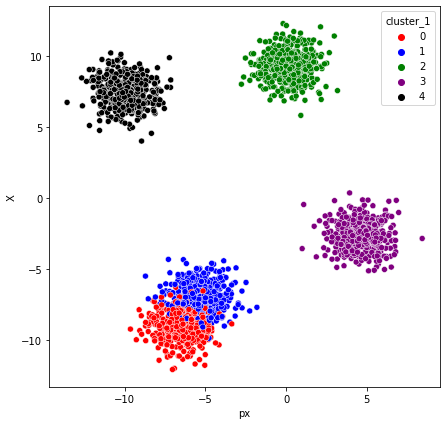

In [155]:
gmm_n5_diag(X_scaled_df)

In [114]:
gmm = GaussianMixture(n_components=5,init_params ="random", covariance_type='diag')

In [115]:
gmm.fit(X_scaled_df)

GaussianMixture(covariance_type='diag', init_params='random', n_components=5)

#### saving the scalar

In [116]:
#gmm_scaled = gmm.fit(X_scaled_df)
#dump(scaler, open('scaler.pkl', 'wb'))


#### Running the predictions

In [117]:
ygmm_hat1 = gmm.predict(X_scaled_df)
#ygmm_hat
X["cluster_1"] = ygmm_hat1
X.head(10)

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster_1
0,0.637,0.643,4,-6.571,0.0519,0.1300,0.000002,0.1420,0.5330,97.008,2
1,0.733,0.436,10,-10.489,0.0800,0.2580,0.000573,0.1570,0.0976,96.985,1
2,0.637,0.398,7,-8.294,0.0564,0.0573,0.000001,0.1010,0.0374,108.075,2
3,0.643,0.363,0,-11.738,0.0767,0.6900,0.000052,0.1150,0.2300,139.865,2
4,0.700,0.550,7,-9.130,0.0653,0.0661,0.000102,0.0910,0.4120,164.003,2
5,0.751,0.502,7,-8.777,0.1620,0.2260,0.000000,0.2970,0.1120,108.989,1
6,0.642,0.620,8,-7.091,0.0666,0.0734,0.000000,0.4830,0.0969,90.020,1
7,0.798,0.277,4,-11.096,0.3900,0.1730,0.000053,0.1210,0.1630,79.846,1
8,0.686,0.507,1,-7.097,0.0357,0.6260,0.000075,0.3830,0.6900,168.955,1
9,0.661,0.352,4,-14.077,0.1170,0.5710,0.001470,0.0884,0.1300,125.934,4


#### Let's plot them to inspect

In [118]:
X, y = make_blobs(n_samples=2299,centers=5)
#X, y = make_blobs(n_samples=2000, centers=5, n_features=10, random_state=2)

In [119]:
X_plot = pd.DataFrame(X)
X_plot.columns=["px","X"]
X_plot["cluster_1"]=y
X_plot.head(20)

,px,X,cluster_1
0,2.716124,-1.046084,3
1,-3.544693,-2.660264,1
2,-1.923539,-3.280210,1
3,-9.981686,6.281645,2
4,-8.610371,-7.083609,4
5,-5.170768,-4.439247,1
6,-9.618511,-5.331086,4
7,-5.122913,-2.657808,1
8,-6.354857,-8.097440,4
9,-0.281796,0.309022,3


<AxesSubplot:xlabel='px', ylabel='X'>

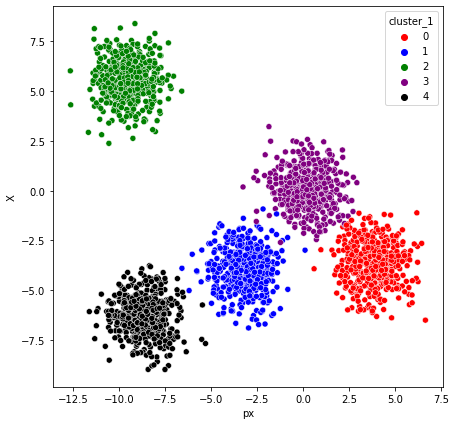

In [120]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=X_plot,x="px",y="X",hue="cluster_1",palette=["red","blue","green", "purple","black"])

#### No clear clustering visible. Too crowded. Try again with more centroids

covariance = 'diag',n_components = 7

In [133]:
gmm2 = GaussianMixture(n_components=7,init_params ="random", covariance_type='diag')
gmm2.fit(X_scaled_df)

GaussianMixture(covariance_type='diag', init_params='random', n_components=7)

In [134]:
ygmm_hat2 = gmm.predict(X_scaled_df)
#ygmm_hat
X["cluster_2"] = ygmm_hat2
X.head(20)

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster_2
0,0.637,0.643,4,-6.571,0.0519,0.1300,0.000002,0.1420,0.5330,97.008,3
1,0.733,0.436,10,-10.489,0.0800,0.2580,0.000573,0.1570,0.0976,96.985,0
2,0.637,0.398,7,-8.294,0.0564,0.0573,0.000001,0.1010,0.0374,108.075,0
3,0.643,0.363,0,-11.738,0.0767,0.6900,0.000052,0.1150,0.2300,139.865,0
4,0.700,0.550,7,-9.130,0.0653,0.0661,0.000102,0.0910,0.4120,164.003,0
5,0.751,0.502,7,-8.777,0.1620,0.2260,0.000000,0.2970,0.1120,108.989,0
6,0.642,0.620,8,-7.091,0.0666,0.0734,0.000000,0.4830,0.0969,90.020,0
7,0.798,0.277,4,-11.096,0.3900,0.1730,0.000053,0.1210,0.1630,79.846,0
8,0.686,0.507,1,-7.097,0.0357,0.6260,0.000075,0.3830,0.6900,168.955,2
9,0.661,0.352,4,-14.077,0.1170,0.5710,0.001470,0.0884,0.1300,125.934,0


<AxesSubplot:xlabel='px', ylabel='X'>

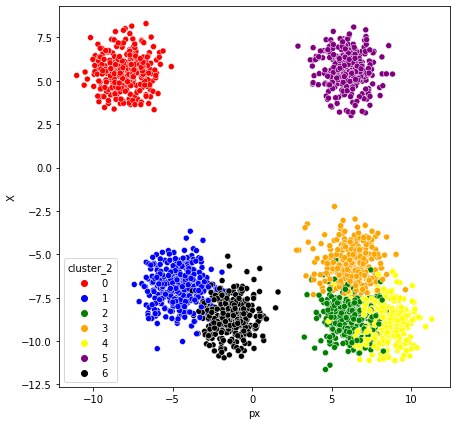

In [135]:
X, y = make_blobs(n_samples=2299, centers=7)
X_plot = pd.DataFrame(X)
X_plot.columns=["px","X"]
X_plot["cluster_2"]=y
X_plot.head(20)
plt.figure(figsize=(7,7))
sns.scatterplot(data=X_plot,x="px",y="X",hue="cluster_2",palette=["red","blue","green","orange","yellow","purple","black"])


#### Improve the predictions again with covariance = tied

covariance = 'tied',n_components = 5

In [136]:
gmm = GaussianMixture(n_components=5,init_params ="random", covariance_type='tied')
gmm.fit(X_scaled_df)

GaussianMixture(covariance_type='tied', init_params='random', n_components=5)

In [138]:
ygmm_hat3 = gmm.predict(X_scaled_df)
#ygmm_hat
X["cluster_3"] = ygmm_hat3
X.head(10)

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster_3
0,0.637,0.643,4,-6.571,0.0519,0.1300,0.000002,0.1420,0.5330,97.008,4
1,0.733,0.436,10,-10.489,0.0800,0.2580,0.000573,0.1570,0.0976,96.985,4
2,0.637,0.398,7,-8.294,0.0564,0.0573,0.000001,0.1010,0.0374,108.075,4
3,0.643,0.363,0,-11.738,0.0767,0.6900,0.000052,0.1150,0.2300,139.865,4
4,0.700,0.550,7,-9.130,0.0653,0.0661,0.000102,0.0910,0.4120,164.003,4
5,0.751,0.502,7,-8.777,0.1620,0.2260,0.000000,0.2970,0.1120,108.989,4
6,0.642,0.620,8,-7.091,0.0666,0.0734,0.000000,0.4830,0.0969,90.020,4
7,0.798,0.277,4,-11.096,0.3900,0.1730,0.000053,0.1210,0.1630,79.846,1
8,0.686,0.507,1,-7.097,0.0357,0.6260,0.000075,0.3830,0.6900,168.955,4
9,0.661,0.352,4,-14.077,0.1170,0.5710,0.001470,0.0884,0.1300,125.934,4


In [ ]:
X, y = make_blobs(n_samples=2299,centers=5)
#X, y = make_blobs(n_samples=2000, centers=5, n_features=10, random_state=2)
X_plot = pd.DataFrame(X)
X_plot.columns=["px","X"]
X_plot["cluster_1"]=y
X_plot.head(20)
plt.figure(figsize=(7,7))
sns.scatterplot(data=X_plot,x="px",y="X",hue="cluster_1",palette=["red","blue","green", "purple","black"])

covariance = 'tied',n_components = 7

In [143]:
gmm = GaussianMixture(n_components=7,init_params ="random", covariance_type='tied')
gmm.fit(X_scaled_df)

GaussianMixture(covariance_type='tied', init_params='random', n_components=7)

In [147]:
ygmm_hat4 = gmm.predict(X_scaled_df)
#ygmm_hat
X["cluster_4"] = ygmm_hat4
X.head(30)

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster_4
0,0.637,0.643,4,-6.571,0.0519,0.1300,0.000002,0.1420,0.5330,97.008,4
1,0.733,0.436,10,-10.489,0.0800,0.2580,0.000573,0.1570,0.0976,96.985,4
2,0.637,0.398,7,-8.294,0.0564,0.0573,0.000001,0.1010,0.0374,108.075,4
3,0.643,0.363,0,-11.738,0.0767,0.6900,0.000052,0.1150,0.2300,139.865,4
4,0.700,0.550,7,-9.130,0.0653,0.0661,0.000102,0.0910,0.4120,164.003,3
5,0.751,0.502,7,-8.777,0.1620,0.2260,0.000000,0.2970,0.1120,108.989,4
6,0.642,0.620,8,-7.091,0.0666,0.0734,0.000000,0.4830,0.0969,90.020,6
7,0.798,0.277,4,-11.096,0.3900,0.1730,0.000053,0.1210,0.1630,79.846,4
8,0.686,0.507,1,-7.097,0.0357,0.6260,0.000075,0.3830,0.6900,168.955,6
9,0.661,0.352,4,-14.077,0.1170,0.5710,0.001470,0.0884,0.1300,125.934,4


<AxesSubplot:xlabel='px', ylabel='X'>

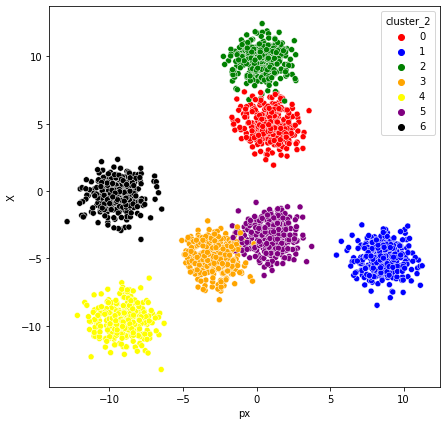

In [148]:
X, y = make_blobs(n_samples=2299, centers=7)
X_plot = pd.DataFrame(X)
X_plot.columns=["px","X"]
X_plot["cluster_2"]=y
X_plot.head(20)
plt.figure(figsize=(7,7))
sns.scatterplot(data=X_plot,x="px",y="X",hue="cluster_2",palette=["red","blue","green","orange","yellow","purple","black"])